In [15]:
#Regularization - used where model is overfit
# 1. Lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split


In [16]:
insurance_data = pd.read_csv("insurance.csv")

X = insurance_data.drop(columns=["charges"])  # input features
Y = insurance_data["charges"]  # output target
#encoding region
X= pd.get_dummies(X, columns = ["region"], drop_first = False, dtype=int)
#encode values
X["sex"] = X["sex"].map({"female" : 1, "male" : 0})
X["smoker"] = X["smoker"].map({"yes" : 1, "no" : 0})

#interaction
X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["bmi"] * X["smoker"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

Mean Squared Error alpha=0.001: 20922596.528006196
Mean Squared Error alpha=0.1: 20921899.287567727
Mean Squared Error alpha=1: 20915761.347724434
Mean Squared Error alpha=2: 20909904.882848244
Mean Squared Error alpha=5: 20894930.887387138
Mean Squared Error alpha=10: 20879460.42907431
Mean Squared Error alpha=20: 20885116.385373842
Mean Squared Error alpha=30: 20939554.097556513
Mean Squared Error alpha=40: 21030365.00375737
Mean Squared Error alpha=50: 21137371.39625106
Mean Squared Error alpha=100: 22325946.521791276


<Axes: >

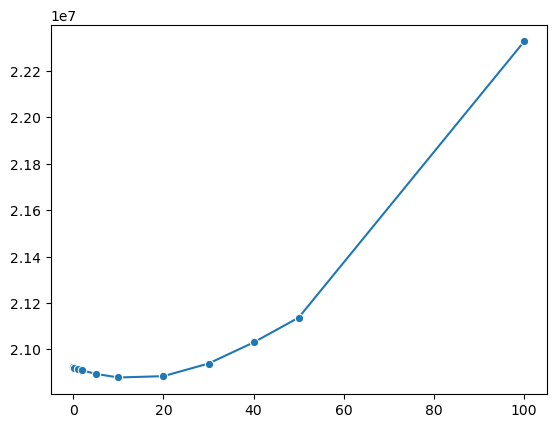

In [34]:
import seaborn as sns

alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
mses = []

for a in alphas :
    lasso_model = Lasso(alpha = a)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error alpha={a}:", mse)
    mses.append(mse)

sns.lineplot(x = alphas, y = mses, marker= "o")

#But this is not a proper way to find alpha value, for that we actually use cross validation

In [42]:
#cross validation - LassoCV
from sklearn.linear_model import LassoCV
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]

lasso_cv_model = LassoCV(
    alphas = alphas, 
    cv = 5, #folds
    max_iter = 1000, #iteration
    random_state = 42,
)
lasso_cv_model.fit(X_train, y_train)

print("Best alpha value :", lasso_cv_model.alpha_)

y_pred = lasso_cv_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best alpha value : 0.001
Mean Squared Error: 20922596.528006196
